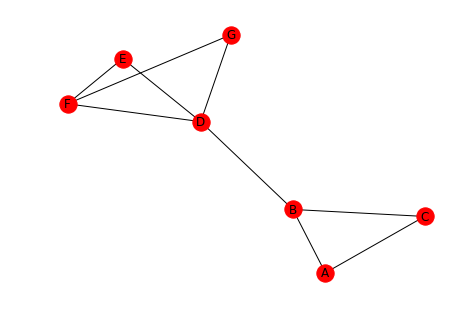

In [43]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
%matplotlib inline
def create_example_graph():
    graph = nx.Graph()
    graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'),
                          ('B', 'D'), ('D', 'E'), ('D', 'F'),
                          ('D', 'G'), ('E', 'F'), ('G', 'F')])
    return graph

graph = create_example_graph()
nx.draw(graph, with_labels=True)

In [2]:
nx.edge_betweenness_centrality(graph, normalized=False)

{('A', 'B'): 5.0,
 ('A', 'C'): 1.0,
 ('B', 'C'): 5.0,
 ('B', 'D'): 12.0,
 ('D', 'E'): 4.5,
 ('D', 'F'): 4.0,
 ('D', 'G'): 4.5,
 ('E', 'F'): 1.5,
 ('F', 'G'): 1.5}

In [4]:
graph.neighbors('B')

['A', 'C', 'D']

In [5]:
from collections import deque

def bfs(graph, start):
    
    q = deque()
    q.append(start)
    seen = set()
    res = []
    while len(q) > 0:
        n = q.popleft()
        if n not in seen:
            res.append(n)
            seen.add(n)
        for nn in graph.neighbors(n):
            if nn not in seen:
                q.append(nn)
    return res

In [6]:
bfs(graph, 'D')

['D', 'B', 'E', 'F', 'G', 'A', 'C']

In [9]:
for s in graph.nodes():
    paths = nx.single_source_shortest_path(graph, s)
    print('shortest path from %s' % s)
    print(paths)

shortest path from A
{'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C'], 'D': ['A', 'B', 'D'], 'E': ['A', 'B', 'D', 'E'], 'F': ['A', 'B', 'D', 'F'], 'G': ['A', 'B', 'D', 'G']}
shortest path from B
{'B': ['B'], 'A': ['B', 'A'], 'C': ['B', 'C'], 'D': ['B', 'D'], 'E': ['B', 'D', 'E'], 'F': ['B', 'D', 'F'], 'G': ['B', 'D', 'G']}
shortest path from C
{'C': ['C'], 'A': ['C', 'A'], 'B': ['C', 'B'], 'D': ['C', 'B', 'D'], 'E': ['C', 'B', 'D', 'E'], 'F': ['C', 'B', 'D', 'F'], 'G': ['C', 'B', 'D', 'G']}
shortest path from D
{'D': ['D'], 'B': ['D', 'B'], 'E': ['D', 'E'], 'F': ['D', 'F'], 'G': ['D', 'G'], 'A': ['D', 'B', 'A'], 'C': ['D', 'B', 'C']}
shortest path from E
{'E': ['E'], 'D': ['E', 'D'], 'F': ['E', 'F'], 'B': ['E', 'D', 'B'], 'G': ['E', 'D', 'G'], 'A': ['E', 'D', 'B', 'A'], 'C': ['E', 'D', 'B', 'C']}
shortest path from F
{'F': ['F'], 'D': ['F', 'D'], 'E': ['F', 'E'], 'G': ['F', 'G'], 'B': ['F', 'D', 'B'], 'A': ['F', 'D', 'B', 'A'], 'C': ['F', 'D', 'B', 'C']}
shortest path from G
{'G': ['G'], 

7

In [41]:
def girvan_newman(G, depth=0):
    
    if G.order() == 1:
        return [G.nodes()]
    
    def find_best_edge(G0):
        """
        {('A', 'B'): 5.0,
         ('A', 'C'): 1.0,
         ('B', 'C'): 5.0,
         ('B', 'D'): 12.0,
         ('D', 'E'): 4.5,
         ('D', 'F'): 4.0,
         ('D', 'G'): 4.5,
         ('E', 'F'): 1.5,
         ('F', 'G'): 1.5}
        """
        eb = nx.edge_betweenness_centrality(G0)
        return sorted(eb.items(), key=lambda x: x[1], reverse=True)[0][0]
    
    components = [c for c in nx.connected_component_subgraphs(G)]
    
    indent = '    ' * depth
    while len(components) == 1:
        edge_to_remove = find_best_edge(G)
        print(indent + 'removing' + str(edge_to_remove))
        G.remove_edge(*edge_to_remove)
        components = [c for c in nx.connected_component_subgraphs(G)]
        
    results = [c.nodes() for c in components]
    print(indent + 'components=' + str(results))
    for c in components:
        results.extend(girvan_newman(c, depth + 1))
    return results

In [44]:
result = girvan_newman(graph)

removing('B', 'D')
components=[['A', 'B', 'C'], ['E', 'D', 'F', 'G']]
    removing('A', 'B')
    removing('A', 'C')
    components=[['A'], ['C', 'B']]
        removing('C', 'B')
        components=[['C'], ['B']]
    removing('E', 'D')
    removing('E', 'F')
    components=[['E'], ['D', 'F', 'G']]
        removing('D', 'F')
        removing('D', 'G')
        components=[['D'], ['G', 'F']]
            removing('G', 'F')
            components=[['G'], ['F']]


In [45]:
result

[['A', 'B', 'C'],
 ['E', 'D', 'F', 'G'],
 ['A'],
 ['C', 'B'],
 ['A'],
 ['C'],
 ['B'],
 ['C'],
 ['B'],
 ['E'],
 ['D', 'F', 'G'],
 ['E'],
 ['D'],
 ['G', 'F'],
 ['D'],
 ['G'],
 ['F'],
 ['G'],
 ['F']]